# Script to generate networks from the Harry Potter movie scripts

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import re
import json
from collections import defaultdict
from nltk import word_tokenize
from nltk.tokenize import RegexpTokenizer
from fa2 import ForceAtlas2

In [2]:
tokenizer = RegexpTokenizer(r'(\w+[-|\']?\w*)')

In [3]:
all_characters = set(json.loads(open("../characters.json").read().decode("utf-8").lower()))

In [4]:
script = open("../movieScripts/(2)_Harry_Potter_and_the_Chamber_of_Secrets.txt","r").read().decode("utf-8")

In [5]:
scenes = defaultdict(str)

In [6]:
regex = re.compile(r"\n(\d+[A-Z]?)[^\.]?\n(.+?)(?=\n\d+[A-Z]?[^\.]?\n?)", re.MULTILINE | re.DOTALL| re.UNICODE)

In [7]:
matches = regex.finditer(script)

In [8]:
for match in matches:
    sceneId = match.group(1)
    dialog = match.group(2)
    scenes[sceneId] += dialog
        

In [9]:
speachRegex = re.compile(r"(^[A-Z c .]{2,})\n", re.MULTILINE | re.UNICODE)

In [10]:
"""movie_characters = defaultdict(str)

for dialog in scenes.itervalues():
    characters = speachRegex.findall(dialog)
    for character in characters:
        name = character.lower()
        movie_characters[name] = name
        
with open("./movie2characters.json", 'w') as f:
    f.write(json.dumps(movie_characters, ensure_ascii=False)) """       

'movie_characters = defaultdict(str)\n\nfor dialog in scenes.itervalues():\n    characters = speachRegex.findall(dialog)\n    for character in characters:\n        name = character.lower()\n        movie_characters[name] = name\n        \nwith open("./movie2characters.json", \'w\') as f:\n    f.write(json.dumps(movie_characters, ensure_ascii=False)) '

In [11]:
occurrences = defaultdict(set)

In [12]:
with open('movie2characters.json') as json_file:  
    name_mappings = json.load(json_file)

In [13]:
for scene, dialog in scenes.iteritems():
    characters = speachRegex.findall(dialog)
    for character in characters:
        if name_mappings.has_key(character.lower()):
            occurrences[scene].add(character.lower())

In [14]:
G = nx.Graph()

In [15]:
for scene, characters in occurrences.iteritems():
    for character in characters:
        G.add_node(name_mappings[character])
        for other in characters:
            if character != other:
                G.add_edge(name_mappings[character], name_mappings[other])
    

In [16]:
len(occurrences.keys())

100

In [17]:
forceatlas2 = ForceAtlas2(
    # Behavior alternatives
    outboundAttractionDistribution=False,  # Dissuade hubs
    linLogMode=False,  # NOT IMPLEMENTED
    adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
    edgeWeightInfluence=1.0,

    # Performance
    jitterTolerance=1.0,  # Tolerance
    barnesHutOptimize=True,
    barnesHutTheta=1.2,
    multiThreaded=False,  # NOT IMPLEMENTED

    # Tuning
    scalingRatio=100.0,
    gravity=1,
    strongGravityMode=False
)

In [18]:
positions = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=1000)

100%|██████████| 1000/1000 [00:00<00:00, 4608.29it/s]


('BarnesHut Approximation', ' took ', '0.05', ' seconds')
('Repulsion forces', ' took ', '0.13', ' seconds')
('Gravitational forces', ' took ', '0.00', ' seconds')
('Attraction forces', ' took ', '0.00', ' seconds')
('AdjustSpeedAndApplyForces step', ' took ', '0.01', ' seconds')


In [19]:
subgraphs = list(nx.connected_component_subgraphs(G))

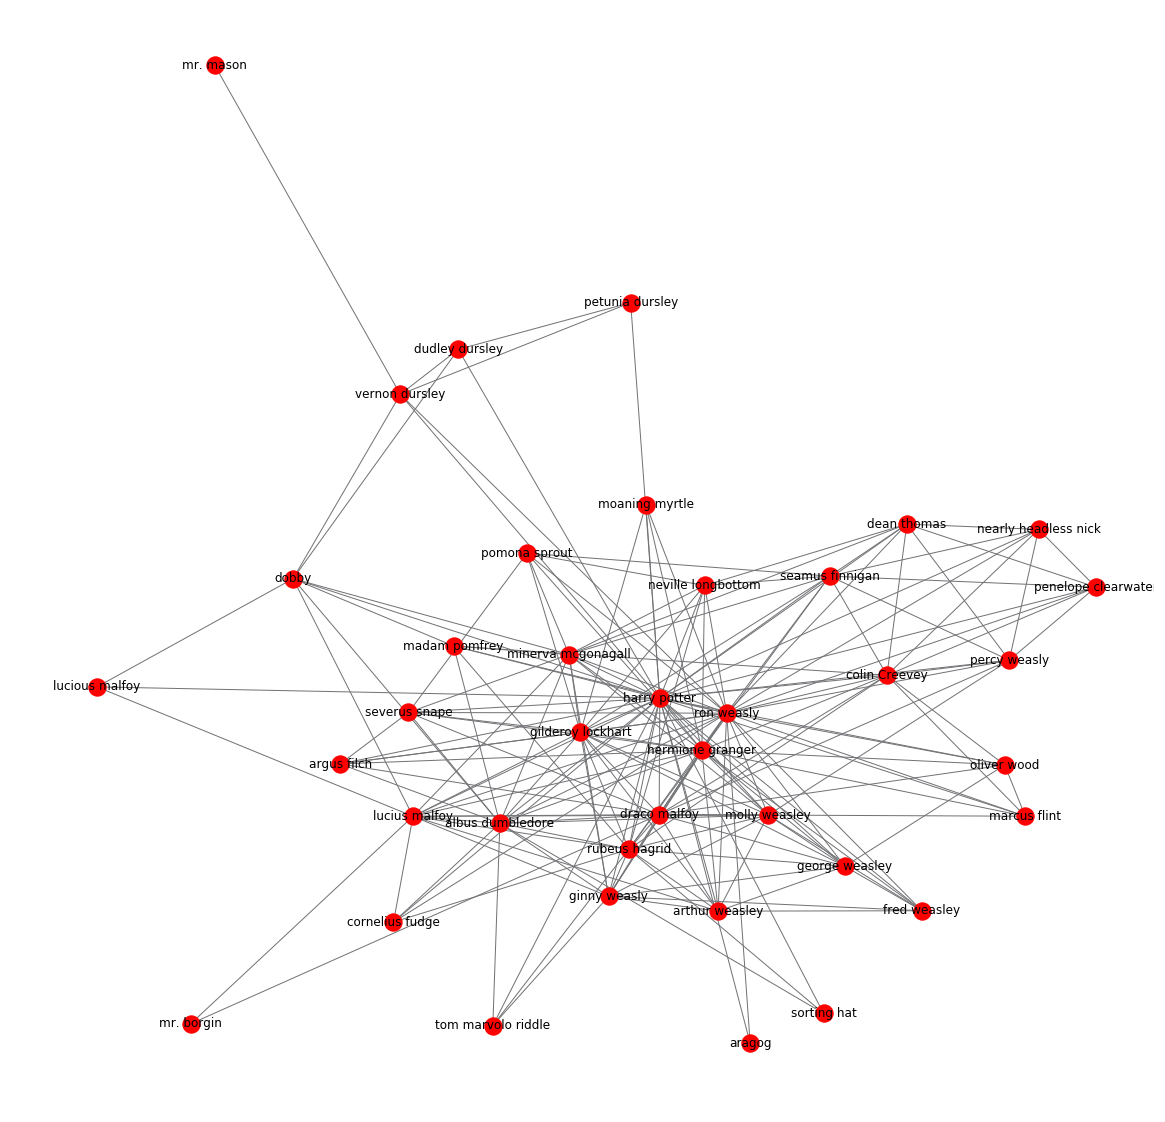

In [22]:
plt.figure(figsize=(20,20))
plt.axis("off")
nx.draw_networkx(subgraphs[0], with_labels=True, edge_color="#727376")

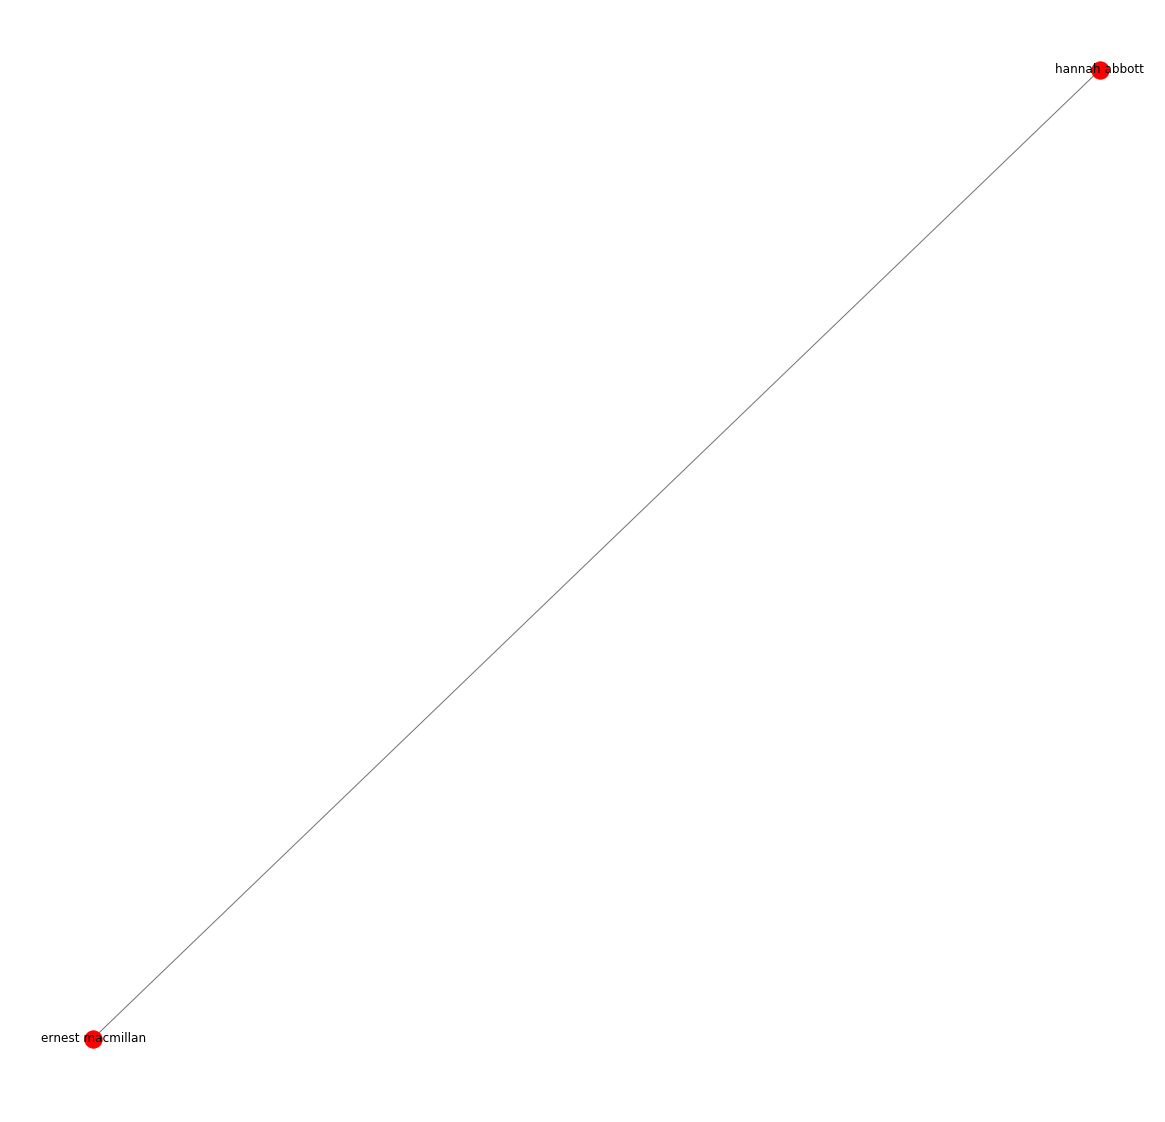

In [21]:
plt.figure(figsize=(20,20))
plt.axis("off")
nx.draw_networkx(subgraphs[1], with_labels=True, edge_color="#727376")